<a href="https://colab.research.google.com/github/DharmikPatel916/CE888/blob/main/assignment/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the Data
essex = pd.read_csv('https://raw.githubusercontent.com/DharmikPatel916/CE888/main/assignment/data/2020-essex__final.csv')
essex.head()

,Unnamed: 0,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
0,0,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
1,1,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
2,2,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
3,3,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,18-24,False,Khat or Cannabis warning
4,4,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,25-34,False,Khat or Cannabis warning


In [3]:
essex.shape

(15872, 10)

In [4]:
#Getting subset and remove nan row
df= pd.concat([essex])
new = df[['Type','Date','City','Officer-defined ethnicity','Self-defined ethnicity','Gender','Age range','Removal of more than just outer clothing','Outcome']]
new_df = new.dropna()
new_df = new_df.reset_index(drop=True)
new_df.head()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
0,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
1,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
2,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
3,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,18-24,False,Khat or Cannabis warning
4,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,25-34,False,Khat or Cannabis warning


In [5]:
new_df.shape

(15872, 9)

In [6]:
#Checking the info of the dataframe
new_df.describe()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
count,15872,15872,15872,15872,15872,15872,15872,15872,15872
unique,2,8,1,4,17,2,5,2,7
top,Person search,2020-05,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,18-24,False,A no further action disposal
freq,11846,2973,15872,12981,11278,13965,6282,15519,12029


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15872 entries, 0 to 15871
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Type                                      15872 non-null  object
 1   Date                                      15872 non-null  object
 2   City                                      15872 non-null  object
 3   Officer-defined ethnicity                 15872 non-null  object
 4   Self-defined ethnicity                    15872 non-null  object
 5   Gender                                    15872 non-null  object
 6   Age range                                 15872 non-null  object
 7   Removal of more than just outer clothing  15872 non-null  bool  
 8   Outcome                                   15872 non-null  object
dtypes: bool(1), object(8)
memory usage: 1007.6+ KB


**There are no null values in the dataset, we can skip the cleaning part.**

In [8]:
#checking the null values in dataframe
new_df.isnull().any()

Type                                        False
Date                                        False
City                                        False
Officer-defined ethnicity                   False
Self-defined ethnicity                      False
Gender                                      False
Age range                                   False
Removal of more than just outer clothing    False
Outcome                                     False
dtype: bool

In [10]:
#By Age
df['Age range'].value_counts()

18-24       6282
10-17       3508
25-34       3323
over 34     2757
under 10       2
Name: Age range, dtype: int64

In [11]:
#Number of officers By Race
df["Officer-defined ethnicity"].value_counts()

White    12981
Black     1512
Asian      781
Other      598
Name: Officer-defined ethnicity, dtype: int64

In [12]:
#Stops By Gender
df["Gender"].value_counts()

Male      13965
Female     1907
Name: Gender, dtype: int64

In [13]:
#frequency distribution of categorical data
new_df['Self-defined ethnicity'].value_counts()

White - English/Welsh/Scottish/Northern Irish/British                                   11278
Other ethnic group - Not stated                                                          1378
White - Any other White background                                                        732
Black/African/Caribbean/Black British - African                                           524
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background      468
Asian/Asian British - Any other Asian background                                          414
Black/African/Caribbean/Black British - Caribbean                                         284
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background                 212
Mixed/Multiple ethnic groups - White and Black Caribbean                                  118
Asian/Asian British - Pakistani                                                            92
Asian/Asian British - Indian                                

In [14]:
#The Self-defined ethnicity column can be simplified and can have race values simillar to officer's race
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('White - English/Welsh/Scottish/Northern Irish/British','White')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Other ethnic group - Not stated','Other')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('White - Any other White background','White')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Black/African/Caribbean/Black British - African','Black')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Black/African/Caribbean/Black British - Any other Black/African/Caribbean background','Black')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Asian/Asian British - Any other Asian background','Asian')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Black/African/Caribbean/Black British - Caribbean','Black')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Asian/Asian British - Pakistani','Asian')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Asian/Asian British - Indian','Asian')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('White - Irish','White')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Asian/Asian British - Bangladeshi','Asian')
new_df['Self-defined ethnicity'] = new_df['Self-defined ethnicity'].str.replace('Asian/Asian British - Chinese','Asian')
                                           
                                          
#We are left with below race as they are mixed and can't be categorized only in one race.                                         
##Mixed/Multiple ethnic groups - White and Black Caribbean                                                                                                                     
#Other ethnic group - Any other ethnic group                                               
#Mixed/Multiple ethnic groups - White and Black African                                    
#Mixed/Multiple ethnic groups - White and Asian


In [15]:
#So the new frequency distribution of categorical data
new_df['Self-defined ethnicity'].value_counts()

White                                                                        12093
Other                                                                         1378
Black                                                                         1276
Asian                                                                          672
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background      212
Mixed/Multiple ethnic groups - White and Black Caribbean                       118
Mixed/Multiple ethnic groups - White and Black African                          43
Other ethnic group - Any other ethnic group                                     43
Mixed/Multiple ethnic groups - White and Asian                                  37
Name: Self-defined ethnicity, dtype: int64

In [16]:
new_df['Outcome'].value_counts()

A no further action disposal       12029
Arrest                              1536
Khat or Cannabis warning            1299
Community resolution                 750
Caution (simple or conditional)      185
Summons / charged by post             69
Penalty Notice for Disorder            4
Name: Outcome, dtype: int64

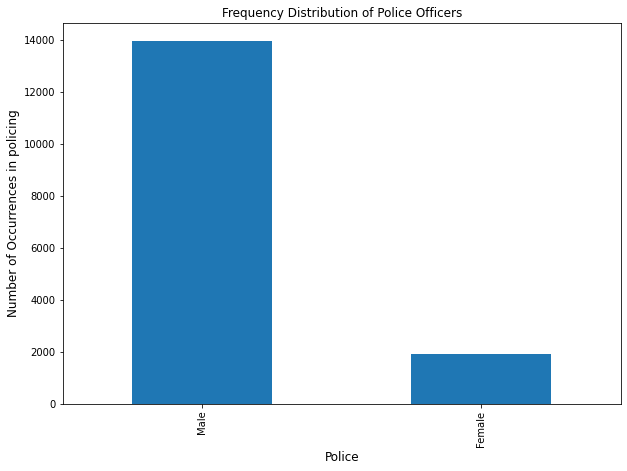

In [17]:
ax = new_df['Gender'].value_counts().plot(kind='bar', figsize=(10,7));
ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in ax.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

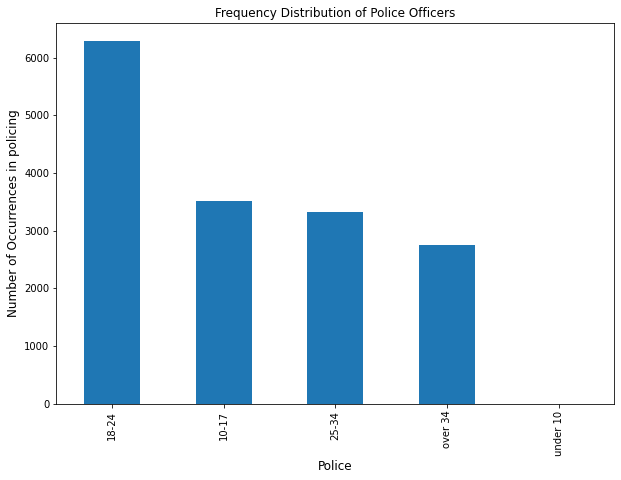

In [18]:
ax = new_df['Age range'].value_counts().plot(kind='bar', figsize=(10,7));
ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in ax.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

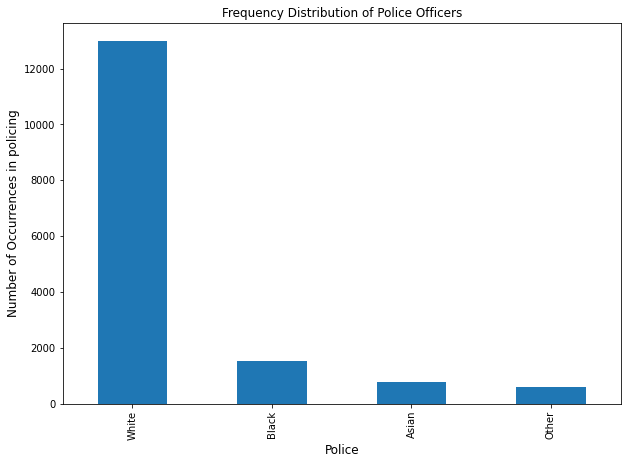

In [19]:
ax = new_df['Officer-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7));
ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in ax.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

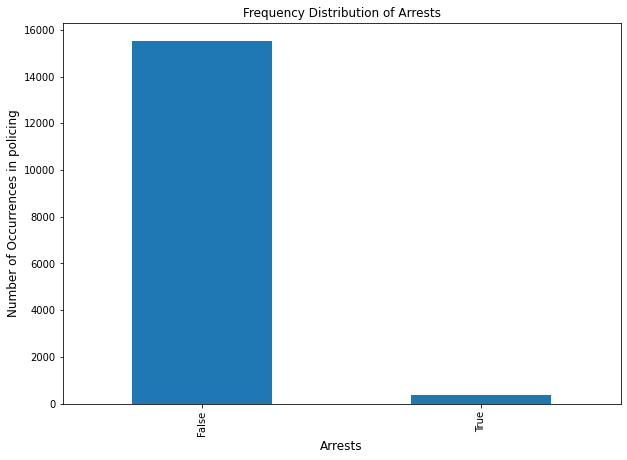

In [20]:
bx = new_df['Removal of more than just outer clothing'].value_counts().plot(kind='bar', figsize=(10,7));
bx.set_title("Frequency Distribution of Arrests", fontsize=12)
bx.set_ylabel('Number of Occurrences in policing', fontsize=12)
bx.set_xlabel('Arrests', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in bx.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

In [21]:
# set individual bar lables using above list
print("percentage of while, black , asian and other police:")
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    a = str(round((i.get_height()/y)*100, 2))
    print(a)

percentage of while, black , asian and other police:
81.79
9.53
4.92
3.77


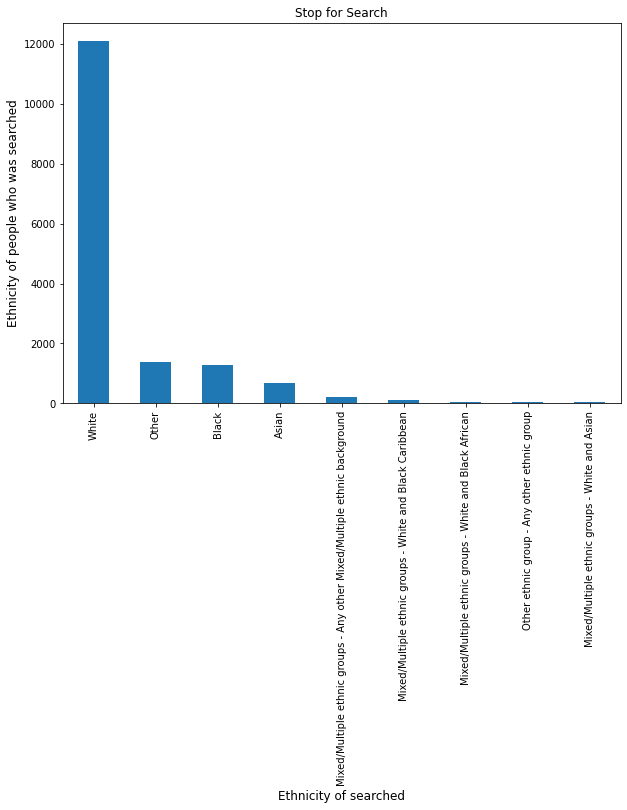

In [22]:
cx = new_df['Self-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7));
cx.set_alpha(0.8)
cx.set_title("Stop for Search", fontsize=12)
cx.set_ylabel('Ethnicity of people who was searched', fontsize=12)
cx.set_xlabel('Ethnicity of searched', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in cx.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

In [23]:
df2 = new_df[["Officer-defined ethnicity","Self-defined ethnicity","Removal of more than just outer clothing"]]
df2.head()

,Officer-defined ethnicity,Self-defined ethnicity,Removal of more than just outer clothing
0,White,White,False
1,White,White,False
2,White,White,False
3,White,White,False
4,White,White,False


In [24]:
labelencoder = LabelEncoder()
df2['Removal of more than just outer clothing'] = labelencoder.fit_transform(df2['Removal of more than just outer clothing'])

df2 = pd.get_dummies(df2, columns=['Self-defined ethnicity'], prefix = ['self'])
print(df2.head())

  Officer-defined ethnicity  ...  self_White
0                     White  ...           1
1                     White  ...           1
2                     White  ...           1
3                     White  ...           1
4                     White  ...           1

[5 rows x 11 columns]


In [25]:
#helper function
def compute_outcome_stats(dfdf):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(dfdf)
    n_warnings = len(dfdf[dfdf['Outcome'] == 'Khat or Cannabis warning'])
    n_penalty = len(dfdf[dfdf['Outcome'] == 'Penalty Notice for Disorder'])
    n_arrests = len(dfdf[dfdf['Outcome'] == 'Arrest'])
    penalty_per_warning = n_penalty / n_warnings
    arrest_rate = n_arrests / n_total

    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_penalty': n_penalty,
        'n_arrests': n_arrests,
        'penalty_per_warning': penalty_per_warning,
        'arrest_rate': arrest_rate
    }))
compute_outcome_stats(df)

n_total                15872.000000
n_warnings              1299.000000
n_penalty                  4.000000
n_arrests               1536.000000
penalty_per_warning        0.003079
arrest_rate                0.096774
dtype: float64

In [26]:
#breakdown by gender (using helper function)
new_df.groupby('Gender').apply(compute_outcome_stats)

,n_total,n_warnings,n_penalty,n_arrests,penalty_per_warning,arrest_rate
Gender,,,,,,
Female,1907.0,129.0,0.0,116.0,0.000000,0.060829
Male,13965.0,1170.0,4.0,1420.0,0.003419,0.101683


In [27]:
#breakdown by race (using helper function)
new_df.groupby('Officer-defined ethnicity').apply(compute_outcome_stats)

,n_total,n_warnings,n_penalty,n_arrests,penalty_per_warning,arrest_rate
Officer-defined ethnicity,,,,,,
Asian,781.0,72.0,0.0,90.0,0.000000,0.115237
Black,1512.0,129.0,1.0,202.0,0.007752,0.133598
Other,598.0,44.0,0.0,54.0,0.000000,0.090301
White,12981.0,1054.0,3.0,1190.0,0.002846,0.091672


In [28]:
#Racial bias
privileged_group = new_df[new_df["Officer-defined ethnicity"] == "White"]
underprivileged_group = new_df[new_df["Officer-defined ethnicity"] != "White"]

In [29]:
#Gender bias
privileged_group_Female = new_df[new_df["Gender"] == "Female"]
underprivileged_group_Male = new_df[new_df["Gender"] == "Male"]

### Analysis of the Priviledge Officers

In [30]:
privileged_group.head()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
0,Person search,2020-01,Colchester,White,White,Male,10-17,False,Community resolution
1,Person search,2020-01,Colchester,White,White,Male,10-17,False,Community resolution
2,Person search,2020-01,Colchester,White,White,Male,10-17,False,Community resolution
3,Person search,2020-01,Colchester,White,White,Male,18-24,False,Khat or Cannabis warning
4,Person search,2020-01,Colchester,White,White,Male,25-34,False,Khat or Cannabis warning


In [31]:
privileged_group.describe()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
count,12981,12981,12981,12981,12981,12981,12981,12981,12981
unique,2,8,1,1,8,2,5,2,7
top,Person search,2020-05,Colchester,White,White,Male,18-24,False,A no further action disposal
freq,9951,2426,12981,12981,12069,11293,4858,12762,9889


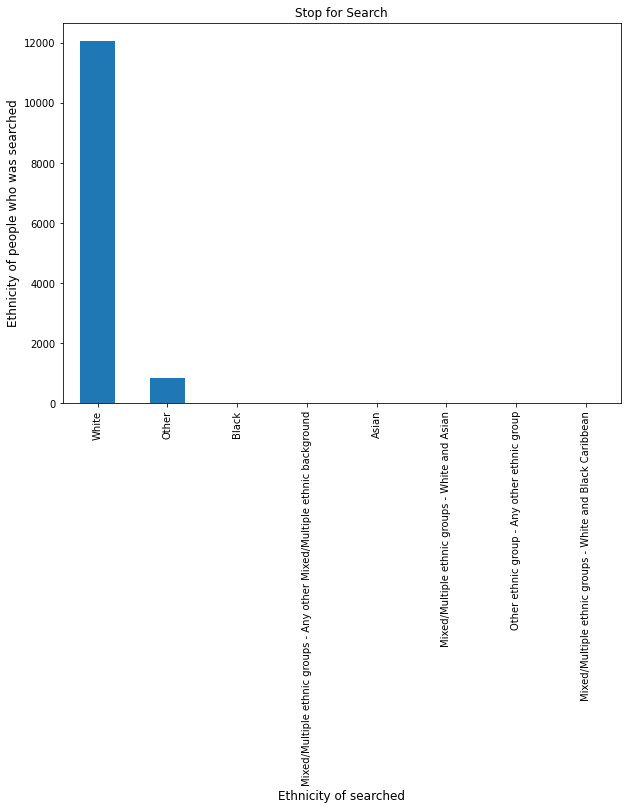

In [32]:
cx = privileged_group['Self-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7));
cx.set_alpha(0.8)
cx.set_title("Stop for Search", fontsize=12)
cx.set_ylabel('Ethnicity of people who was searched', fontsize=12)
cx.set_xlabel('Ethnicity of searched', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in cx.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

In [33]:
privileged_group.head()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
0,Person search,2020-01,Colchester,White,White,Male,10-17,False,Community resolution
1,Person search,2020-01,Colchester,White,White,Male,10-17,False,Community resolution
2,Person search,2020-01,Colchester,White,White,Male,10-17,False,Community resolution
3,Person search,2020-01,Colchester,White,White,Male,18-24,False,Khat or Cannabis warning
4,Person search,2020-01,Colchester,White,White,Male,25-34,False,Khat or Cannabis warning


In [34]:
privileged_group_1 =privileged_group.pivot_table(values='Outcome', index=['Officer-defined ethnicity','Age range'],aggfunc='count')
privileged_group_1


Outcome
Officer-defined ethnicity Age range         
White                     10-17         3035
                          18-24         4858
                          25-34         2643
                          over 34       2443
                          under 10         2

In [35]:
privileged_group_1 =privileged_group.pivot_table(values='Self-defined ethnicity', index=['Outcome'],aggfunc='count')
privileged_group_1

,Self-defined ethnicity
Outcome,
A no further action disposal,9889
Arrest,1190
Caution (simple or conditional),150
Community resolution,639
Khat or Cannabis warning,1054
Penalty Notice for Disorder,3
Summons / charged by post,56


In [36]:
privileged_group_1 =privileged_group.pivot_table(values='Self-defined ethnicity', index=['Outcome','Removal of more than just outer clothing'],aggfunc='count')
privileged_group_1

Self-defined ethnicity
Outcome                         Removal of more than just outer clothing                        
A no further action disposal    False                                                       9744
                                True                                                         145
Arrest                          False                                                       1149
                                True                                                          41
Caution (simple or conditional) False                                                        148
                                True                                                           2
Community resolution            False                                                        632
                                True                                                           7
Khat or Cannabis warning        False                                                       1035
                                True                                                          19
Penalty Notice for Disorder     False                                                          2
                                True                                                           1
Summons / charged by post       False                                                         52
                                True                                                           4

**From the Above figures we can see there are scenario when no action were taken by police but still they remove the clothes of certain Ethencity people**

In [37]:
privileged_group_1 =privileged_group.pivot_table(values='Gender', index=['Self-defined ethnicity','Outcome'],aggfunc='count')
privileged_group_1

Gender
Self-defined ethnicity                             Outcome                                
Asian                                              A no further action disposal          3
                                                   Arrest                                1
                                                   Khat or Cannabis warning              2
Black                                              A no further action disposal         22
                                                   Arrest                                2
                                                   Community resolution                  3
                                                   Khat or Cannabis warning              3
Mixed/Multiple ethnic groups - Any other Mixed/... A no further action disposal         10
                                                   Arrest                                2
                                                   Khat or Cannabis warning              1
                                                   Summons / charged by post             1
Mixed/Multiple ethnic groups - White and Asian     A no further action disposal          2
Mixed/Multiple ethnic groups - White and Black ... A no further action disposal          1
Other                                              A no further action disposal        693
                                                   Arrest                               65
                                                   Caution (simple or conditional)       4
                                                   Community resolution                 23
                                                   Khat or Cannabis warning             68
                                                   Summons / charged by post             5
Other ethnic group - Any other ethnic group        A no further action disposal          1
White                                              A no further action disposal       9157
                                                   Arrest                             1120
                                                   Caution (simple or conditional)     146
                                                   Community resolution                613
                                                   Khat or Cannabis warning            980
                                                   Penalty Notice for Disorder           3
                                                   Summons / charged by post            50

**From the Above Analysis we can see police stop and search people with no ethencity mention where no action is taken by police.**

In [38]:
privileged_group_1 =privileged_group.pivot_table(values='Self-defined ethnicity', index=['Gender','Outcome','Removal of more than just outer clothing'],aggfunc='count')
privileged_group_1

Self-defined ethnicity
Gender Outcome                         Removal of more than just outer clothing                        
Female A no further action disposal    False                                                       1374
                                       True                                                          13
       Arrest                          False                                                        100
                                       True                                                           1
       Caution (simple or conditional) False                                                         18
                                       True                                                           1
       Community resolution            False                                                         66
                                       True                                                           1
       Khat or Cannabis warning        False                                                        109
       Summons / charged by post       False                                                          4
                                       True                                                           1
Male   A no further action disposal    False                                                       8370
                                       True                                                         132
       Arrest                          False                                                       1049
                                       True                                                          40
       Caution (simple or conditional) False                                                        130
                                       True                                                           1
       Community resolution            False                                                        566
                                       True                                                           6
       Khat or Cannabis warning        False                                                        926
                                       True                                                          19
       Penalty Notice for Disorder     False                                                          2
                                       True                                                           1
       Summons / charged by post       False                                                         48
                                       True                                                           3

**The Above figures shhows that police stop and search and do clothes removal for Male and Female even when they do not require any further action on. They were stop as suspects**

In [39]:
privileged_group_1 =privileged_group.pivot_table(values='Outcome', index=['Self-defined ethnicity'],aggfunc='count')
privileged_group_1

,Outcome
Self-defined ethnicity,
Asian,6
Black,30
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background,14
Mixed/Multiple ethnic groups - White and Asian,2
Mixed/Multiple ethnic groups - White and Black Caribbean,1
Other,858
Other ethnic group - Any other ethnic group,1
White,12069


### Analysis of Under Priviledge Officers

In [40]:
underprivileged_group.describe()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
count,2891,2891,2891,2891,2891,2891,2891,2891,2891
unique,2,8,1,3,9,2,4,2,7
top,Person search,2020-05,Colchester,Black,Black,Male,18-24,False,A no further action disposal
freq,1895,547,2891,1512,1246,2672,1424,2757,2140


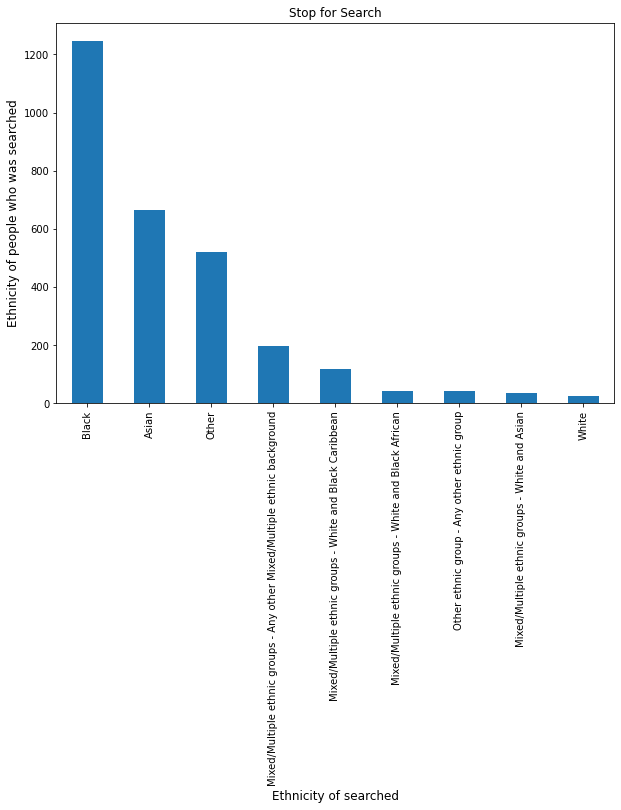

In [41]:
cx = underprivileged_group['Self-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7));
cx.set_alpha(0.8)
cx.set_title("Stop for Search", fontsize=12)
cx.set_ylabel('Ethnicity of people who was searched', fontsize=12)
cx.set_xlabel('Ethnicity of searched', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in cx.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

**The above plot shows the officers with ethenticity other white were the one who stops or search people of other race than White's.**

In [42]:
underprivileged_group_1 =underprivileged_group.pivot_table(values='Outcome', index=['Officer-defined ethnicity','Age range'],aggfunc='count')
underprivileged_group_1

Outcome
Officer-defined ethnicity Age range         
Asian                     10-17           76
                          18-24          412
                          25-34          212
                          over 34         81
Black                     10-17          226
                          18-24          761
                          25-34          359
                          over 34        166
Other                     10-17          171
                          18-24          251
                          25-34          109
                          over 34         67

In [43]:
underprivileged_group_1 =underprivileged_group.pivot_table(values='Self-defined ethnicity', index=['Outcome'],aggfunc='count')
underprivileged_group_1

,Self-defined ethnicity
Outcome,
A no further action disposal,2140
Arrest,346
Caution (simple or conditional),35
Community resolution,111
Khat or Cannabis warning,245
Penalty Notice for Disorder,1
Summons / charged by post,13


In [44]:
underprivileged_group_1 =underprivileged_group.pivot_table(values='Self-defined ethnicity', index=['Outcome','Removal of more than just outer clothing'],aggfunc='count')
underprivileged_group_1

Self-defined ethnicity
Outcome                         Removal of more than just outer clothing                        
A no further action disposal    False                                                       2057
                                True                                                          83
Arrest                          False                                                        314
                                True                                                          32
Caution (simple or conditional) False                                                         32
                                True                                                           3
Community resolution            False                                                        107
                                True                                                           4
Khat or Cannabis warning        False                                                        234
                                True                                                          11
Penalty Notice for Disorder     False                                                          1
Summons / charged by post       False                                                         12
                                True                                                           1

In [45]:
underprivileged_group_1 =underprivileged_group.pivot_table(values='Gender', index=['Self-defined ethnicity','Outcome'],aggfunc='count')
underprivileged_group_1

Gender
Self-defined ethnicity                             Outcome                                
Asian                                              A no further action disposal        479
                                                   Arrest                               83
                                                   Caution (simple or conditional)      14
                                                   Community resolution                 23
                                                   Khat or Cannabis warning             66
                                                   Summons / charged by post             1
Black                                              A no further action disposal        885
                                                   Arrest                              181
                                                   Caution (simple or conditional)      14
                                                   Community resolution                 50
                                                   Khat or Cannabis warning            108
                                                   Penalty Notice for Disorder           1
                                                   Summons / charged by post             7
Mixed/Multiple ethnic groups - Any other Mixed/... A no further action disposal        146
                                                   Arrest                               18
                                                   Caution (simple or conditional)       2
                                                   Community resolution                 17
                                                   Khat or Cannabis warning             13
                                                   Summons / charged by post             2
Mixed/Multiple ethnic groups - White and Asian     A no further action disposal         24
                                                   Arrest                                4
                                                   Khat or Cannabis warning              7
Mixed/Multiple ethnic groups - White and Black ... A no further action disposal         34
                                                   Arrest                                4
                                                   Caution (simple or conditional)       1
                                                   Community resolution                  1
                                                   Khat or Cannabis warning              2
                                                   Summons / charged by post             1
Mixed/Multiple ethnic groups - White and Black ... A no further action disposal         84
                                                   Arrest                               17
                                                   Caution (simple or conditional)       2
                                                   Community resolution                  4
                                                   Khat or Cannabis warning             10
Other                                              A no further action disposal        436
                                                   Arrest                               34
                                                   Caution (simple or conditional)       2
                                                   Community resolution                 12
                                                   Khat or Cannabis warning             34
                                                   Summons / charged by post             2
Other ethnic group - Any other ethnic group        A no further action disposal         32
                                                   Arrest                                3
                                                   Community resolution                  4
                                                   Khat or Cannabis warning     

In [46]:
underprivileged_group_1 =underprivileged_group.pivot_table(values='Self-defined ethnicity', index=['Gender','Outcome','Removal of more than just outer clothing'],aggfunc='count')
underprivileged_group_1

Self-defined ethnicity
Gender Outcome                         Removal of more than just outer clothing                        
Female A no further action disposal    False                                                        159
                                       True                                                           3
       Arrest                          False                                                         14
                                       True                                                           1
       Caution (simple or conditional) False                                                          4
       Community resolution            False                                                         17
                                       True                                                           1
       Khat or Cannabis warning        False                                                         19
                                       True                                                           1
Male   A no further action disposal    False                                                       1898
                                       True                                                          80
       Arrest                          False                                                        300
                                       True                                                          31
       Caution (simple or conditional) False                                                         28
                                       True                                                           3
       Community resolution            False                                                         90
                                       True                                                           3
       Khat or Cannabis warning        False                                                        215
                                       True                                                          10
       Penalty Notice for Disorder     False                                                          1
       Summons / charged by post       False                                                         12
                                       True                                                           1

In [47]:
underprivileged_group_1 =underprivileged_group.pivot_table(values='Outcome', index=['Self-defined ethnicity'],aggfunc='count')
underprivileged_group_1

,Outcome
Self-defined ethnicity,
Asian,666
Black,1246
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background,198
Mixed/Multiple ethnic groups - White and Asian,35
Mixed/Multiple ethnic groups - White and Black African,43
Mixed/Multiple ethnic groups - White and Black Caribbean,117
Other,520
Other ethnic group - Any other ethnic group,42
White,24


### Analysis based on Gender for privileged Gender (Female)

In [48]:
privileged_group_Female.describe()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
count,1907,1907,1907,1907,1907,1907,1907,1907,1907
unique,2,8,1,4,9,1,5,2,6
top,Person search,2020-05,Colchester,White,White,Female,18-24,False,A no further action disposal
freq,1445,356,1907,1688,1589,1907,762,1884,1549


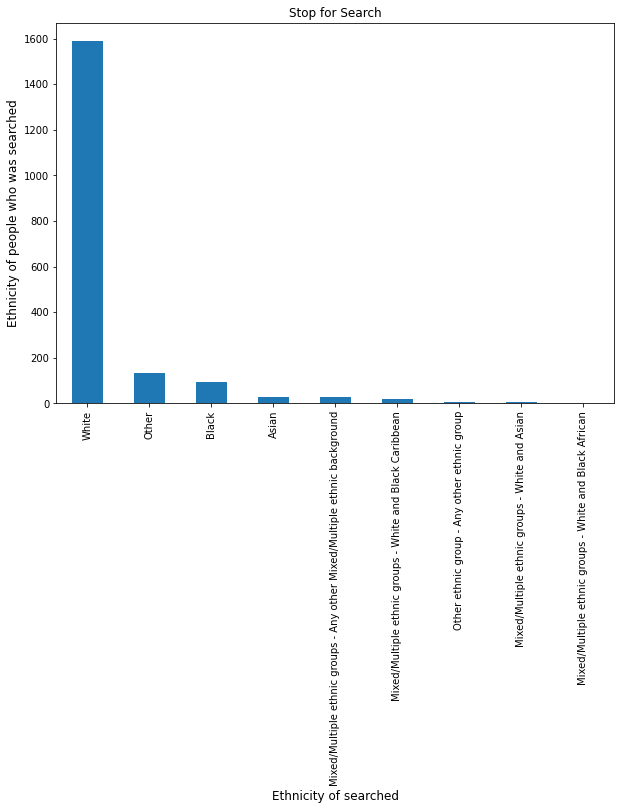

In [49]:
cx = privileged_group_Female['Self-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7));
cx.set_alpha(0.8)
cx.set_title("Stop for Search", fontsize=12)
cx.set_ylabel('Ethnicity of people who was searched', fontsize=12)
cx.set_xlabel('Ethnicity of searched', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in cx.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

**The Above plot clearly shows that Female police officers stop and search the people with white enthenticity.**

In [50]:
privileged_group_Female_1 =privileged_group_Female.pivot_table(values='Outcome', index=['Officer-defined ethnicity','Age range'],aggfunc='count')
privileged_group_Female_1

Outcome
Officer-defined ethnicity Age range         
Asian                     10-17            5
                          18-24           20
                          25-34            6
                          over 34          3
Black                     10-17           17
                          18-24           52
                          25-34           14
                          over 34         14
Other                     10-17           23
                          18-24           49
                          25-34           15
                          over 34          1
White                     10-17          419
                          18-24          641
                          25-34          282
                          over 34        345
                          under 10         1

In [51]:
privileged_group_Female_1 =privileged_group_Female.pivot_table(values='Self-defined ethnicity', index=['Outcome'],aggfunc='count')
privileged_group_Female_1

,Self-defined ethnicity
Outcome,
A no further action disposal,1549
Arrest,116
Caution (simple or conditional),23
Community resolution,85
Khat or Cannabis warning,129
Summons / charged by post,5


In [52]:
privileged_group_Female_1 =privileged_group_Female.pivot_table(values='Self-defined ethnicity', index=['Outcome','Removal of more than just outer clothing'],aggfunc='count')
privileged_group_Female_1

Self-defined ethnicity
Outcome                         Removal of more than just outer clothing                        
A no further action disposal    False                                                       1533
                                True                                                          16
Arrest                          False                                                        114
                                True                                                           2
Caution (simple or conditional) False                                                         22
                                True                                                           1
Community resolution            False                                                         83
                                True                                                           2
Khat or Cannabis warning        False                                                        128
                                True                                                           1
Summons / charged by post       False                                                          4
                                True                                                           1

In [53]:
privileged_group_Female_1 =privileged_group_Female.pivot_table(values='Gender', index=['Self-defined ethnicity','Outcome'],aggfunc='count')
privileged_group_Female_1

Gender
Self-defined ethnicity                             Outcome                                
Asian                                              A no further action disposal         17
                                                   Arrest                                1
                                                   Caution (simple or conditional)       4
                                                   Community resolution                  4
                                                   Khat or Cannabis warning              4
Black                                              A no further action disposal         65
                                                   Arrest                               12
                                                   Community resolution                  7
                                                   Khat or Cannabis warning              9
Mixed/Multiple ethnic groups - Any other Mixed/... A no further action disposal         19
                                                   Arrest                                1
                                                   Community resolution                  6
                                                   Khat or Cannabis warning              3
Mixed/Multiple ethnic groups - White and Asian     A no further action disposal          4
                                                   Arrest                                1
Mixed/Multiple ethnic groups - White and Black ... A no further action disposal          4
Mixed/Multiple ethnic groups - White and Black ... A no further action disposal         17
                                                   Khat or Cannabis warning              3
Other                                              A no further action disposal        114
                                                   Arrest                                3
                                                   Caution (simple or conditional)       2
                                                   Community resolution                  5
                                                   Khat or Cannabis warning              7
                                                   Summons / charged by post             1
Other ethnic group - Any other ethnic group        A no further action disposal          3
                                                   Community resolution                  2
White                                              A no further action disposal       1306
                                                   Arrest                               98
                                                   Caution (simple or conditional)      17
                                                   Community resolution                 61
                                                   Khat or Cannabis warning            103
                                                   Summons / charged by post             4

In [54]:
privileged_group_Female_1 =privileged_group_Female.pivot_table(values='Self-defined ethnicity', index=['Gender','Outcome','Removal of more than just outer clothing'],aggfunc='count')
underprivileged_group_1

,Outcome
Self-defined ethnicity,
Asian,666
Black,1246
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background,198
Mixed/Multiple ethnic groups - White and Asian,35
Mixed/Multiple ethnic groups - White and Black African,43
Mixed/Multiple ethnic groups - White and Black Caribbean,117
Other,520
Other ethnic group - Any other ethnic group,42
White,24


In [55]:
privileged_group_Female_1 =privileged_group_Female.pivot_table(values='Outcome', index=['Self-defined ethnicity'],aggfunc='count')
privileged_group_Female_1

,Outcome
Self-defined ethnicity,
Asian,30
Black,93
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background,29
Mixed/Multiple ethnic groups - White and Asian,5
Mixed/Multiple ethnic groups - White and Black African,4
Mixed/Multiple ethnic groups - White and Black Caribbean,20
Other,132
Other ethnic group - Any other ethnic group,5
White,1589


### Analysis based on Gender for privileged Gender (Male)

In [56]:
underprivileged_group_Male.describe()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
count,13965,13965,13965,13965,13965,13965,13965,13965,13965
unique,2,8,1,4,9,1,5,2,7
top,Person search,2020-05,Colchester,White,White,Male,18-24,False,A no further action disposal
freq,10401,2617,13965,11293,10504,13965,5520,13635,10480


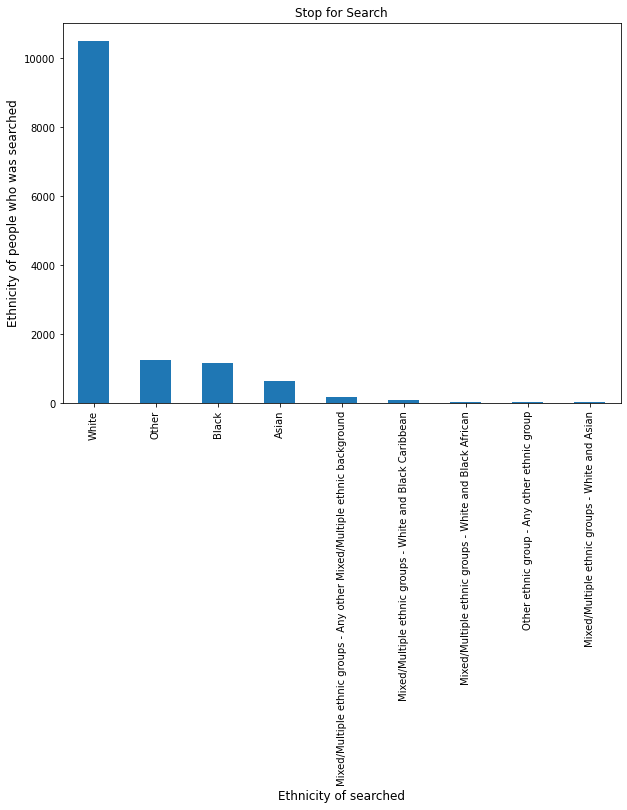

In [57]:
cx = underprivileged_group_Male['Self-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7));
cx.set_alpha(0.8)
cx.set_title("Stop for Search", fontsize=12)
cx.set_ylabel('Ethnicity of people who was searched', fontsize=12)
cx.set_xlabel('Ethnicity of searched', fontsize=12)
# create a list to collect the plt.patches data
y = []
# find the values and append to list
for i in cx.patches:
    y.append(i.get_height())
# set individual bar lables using above list
y = sum(y)

In [58]:
underprivileged_group_Male_1 =underprivileged_group_Male.pivot_table(values='Outcome', index=['Officer-defined ethnicity','Age range'],aggfunc='count')
underprivileged_group_Male_1

Outcome
Officer-defined ethnicity Age range         
Asian                     10-17           71
                          18-24          392
                          25-34          206
                          over 34         78
Black                     10-17          209
                          18-24          709
                          25-34          345
                          over 34        152
Other                     10-17          148
                          18-24          202
                          25-34           94
                          over 34         66
White                     10-17         2616
                          18-24         4217
                          25-34         2361
                          over 34       2098
                          under 10         1

In [59]:
underprivileged_group_Male_1 =underprivileged_group_Male.pivot_table(values='Self-defined ethnicity', index=['Outcome'],aggfunc='count')
underprivileged_group_Male_1

,Self-defined ethnicity
Outcome,
A no further action disposal,10480
Arrest,1420
Caution (simple or conditional),162
Community resolution,665
Khat or Cannabis warning,1170
Penalty Notice for Disorder,4
Summons / charged by post,64


In [60]:
underprivileged_group_Male_1 =underprivileged_group_Male.pivot_table(values='Self-defined ethnicity', index=['Outcome','Removal of more than just outer clothing'],aggfunc='count')
underprivileged_group_Male_1

Self-defined ethnicity
Outcome                         Removal of more than just outer clothing                        
A no further action disposal    False                                                      10268
                                True                                                         212
Arrest                          False                                                       1349
                                True                                                          71
Caution (simple or conditional) False                                                        158
                                True                                                           4
Community resolution            False                                                        656
                                True                                                           9
Khat or Cannabis warning        False                                                       1141
                                True                                                          29
Penalty Notice for Disorder     False                                                          3
                                True                                                           1
Summons / charged by post       False                                                         60
                                True                                                           4

In [61]:
underprivileged_group_Male_1 =underprivileged_group_Male.pivot_table(values='Gender', index=['Self-defined ethnicity','Outcome'],aggfunc='count')
underprivileged_group_Male_1

Gender
Self-defined ethnicity                             Outcome                                
Asian                                              A no further action disposal        465
                                                   Arrest                               83
                                                   Caution (simple or conditional)      10
                                                   Community resolution                 19
                                                   Khat or Cannabis warning             64
                                                   Summons / charged by post             1
Black                                              A no further action disposal        842
                                                   Arrest                              171
                                                   Caution (simple or conditional)      14
                                                   Community resolution                 46
                                                   Khat or Cannabis warning            102
                                                   Penalty Notice for Disorder           1
                                                   Summons / charged by post             7
Mixed/Multiple ethnic groups - Any other Mixed/... A no further action disposal        137
                                                   Arrest                               19
                                                   Caution (simple or conditional)       2
                                                   Community resolution                 11
                                                   Khat or Cannabis warning             11
                                                   Summons / charged by post             3
Mixed/Multiple ethnic groups - White and Asian     A no further action disposal         22
                                                   Arrest                                3
                                                   Khat or Cannabis warning              7
Mixed/Multiple ethnic groups - White and Black ... A no further action disposal         30
                                                   Arrest                                4
                                                   Caution (simple or conditional)       1
                                                   Community resolution                  1
                                                   Khat or Cannabis warning              2
                                                   Summons / charged by post             1
Mixed/Multiple ethnic groups - White and Black ... A no further action disposal         68
                                                   Arrest                               17
                                                   Caution (simple or conditional)       2
                                                   Community resolution                  4
                                                   Khat or Cannabis warning              7
Other                                              A no further action disposal       1015
                                                   Arrest                               96
                                                   Caution (simple or conditional)       4
                                                   Community resolution                 30
                                                   Khat or Cannabis warning             95
                                                   Summons / charged by post             6
Other ethnic group - Any other ethnic group        A no further action disposal         30
                                                   Arrest                                3
                                                   Community resolution                  2
                                                   Khat or Cannabis warning     

In [62]:
underprivileged_group_Male_1 =underprivileged_group_Male.pivot_table(values='Self-defined ethnicity', index=['Gender','Outcome','Removal of more than just outer clothing'],aggfunc='count')
underprivileged_group_Male_1

Self-defined ethnicity
Gender Outcome                         Removal of more than just outer clothing                        
Male   A no further action disposal    False                                                      10268
                                       True                                                         212
       Arrest                          False                                                       1349
                                       True                                                          71
       Caution (simple or conditional) False                                                        158
                                       True                                                           4
       Community resolution            False                                                        656
                                       True                                                           9
       Khat or Cannabis warning        False                                                       1141
                                       True                                                          29
       Penalty Notice for Disorder     False                                                          3
                                       True                                                           1
       Summons / charged by post       False                                                         60
                                       True                                                           4

In [63]:
underprivileged_group_Male_1 =underprivileged_group_Male.pivot_table(values='Outcome', index=['Self-defined ethnicity'],aggfunc='count')
underprivileged_group_Male_1

,Outcome
Self-defined ethnicity,
Asian,642
Black,1183
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background,183
Mixed/Multiple ethnic groups - White and Asian,32
Mixed/Multiple ethnic groups - White and Black African,39
Mixed/Multiple ethnic groups - White and Black Caribbean,98
Other,1246
Other ethnic group - Any other ethnic group,38
White,10504


## Conclusion

1. Police has larger group of Whites Male as compare to other Race and Gender.
2. Police do a lot Clothes removal search even for Female gender, when they even dont find anything on them.
3. Most of the arrests are made for the people with Black race, they are even fined by white officers.
4. Illegal substance are most of the time is found with people Black/Asian Ethenticity.